In [2]:
# Import Libraries for Analysis

# Core Data Handling and Math
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series and Statistical Modeling
from statsmodels.tsa.stattools import adfuller #import ADF test
from statsmodels.tsa.statespace.sarimax import SARIMAX # import the SARIMAX model

# Machine Learning Utilities
from sklearn.metrics import mean_squared_error, mean_absolute_error # import evaluation metrics
from sklearn.model_selection import train_test_split # import train/test splitter

In [6]:
# Load the data
df = pd.read_csv("Dengue_Climate_Bangladesh_Data.csv")

In [9]:
# view the first 10 rows
df.head(10)

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,2008,1,10.2,25.1,78.8,39.9,0
1,2008,2,9.1,26.4,72.6,19.9,0
2,2008,3,15.8,31.4,76.9,30.2,0
3,2008,4,19.0,34.0,73.9,29.4,0
4,2008,5,21.1,34.2,77.4,217.7,0
5,2008,6,22.7,31.8,85.7,425.3,0
6,2008,7,24.2,31.1,88.1,699.5,160
7,2008,8,24.2,31.7,86.8,431.2,473
8,2008,9,23.7,32.4,85.2,273.2,334
9,2008,10,19.1,31.5,83.9,227.3,184


In [12]:
# creating a standard datetime column

df['day'] = 1 # temporary day column
df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'day']])

In [14]:
# make the date column the index
df = df.set_index('Date').sort_index()

In [17]:
# remove redundant columns
df  = df.drop(columns=['YEAR','MONTH','day'])

In [22]:
# rename columns
df.columns = ['min_temp', 'max_temp', 'rel_humidity', 'rainfall', 'dengue_cases']

In [28]:
# checking for null values
df.isna().sum()

min_temp        0
max_temp        0
rel_humidity    0
rainfall        0
dengue_cases    0
dtype: int64

In [27]:
# statistical summary of the columns
df.describe()

,min_temp,max_temp,rel_humidity,rainfall,dengue_cases
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,18.630556,31.563889,80.077222,194.316667,1225.400000
std,5.561209,3.008494,5.207105,198.549141,4913.794691
min,6.200000,24.200000,67.500000,0.000000,0.000000
25%,13.675000,30.100000,76.975000,12.675000,5.500000
50%,19.900000,32.400000,80.500000,148.700000,55.500000
75%,23.900000,33.450000,84.700000,318.550000,293.500000
max,26.300000,37.000000,88.100000,881.300000,52636.000000


In [43]:
# checking for data types
df.dtypes

min_temp        float64
max_temp        float64
rel_humidity    float64
rainfall        float64
dengue_cases      int64
dtype: object

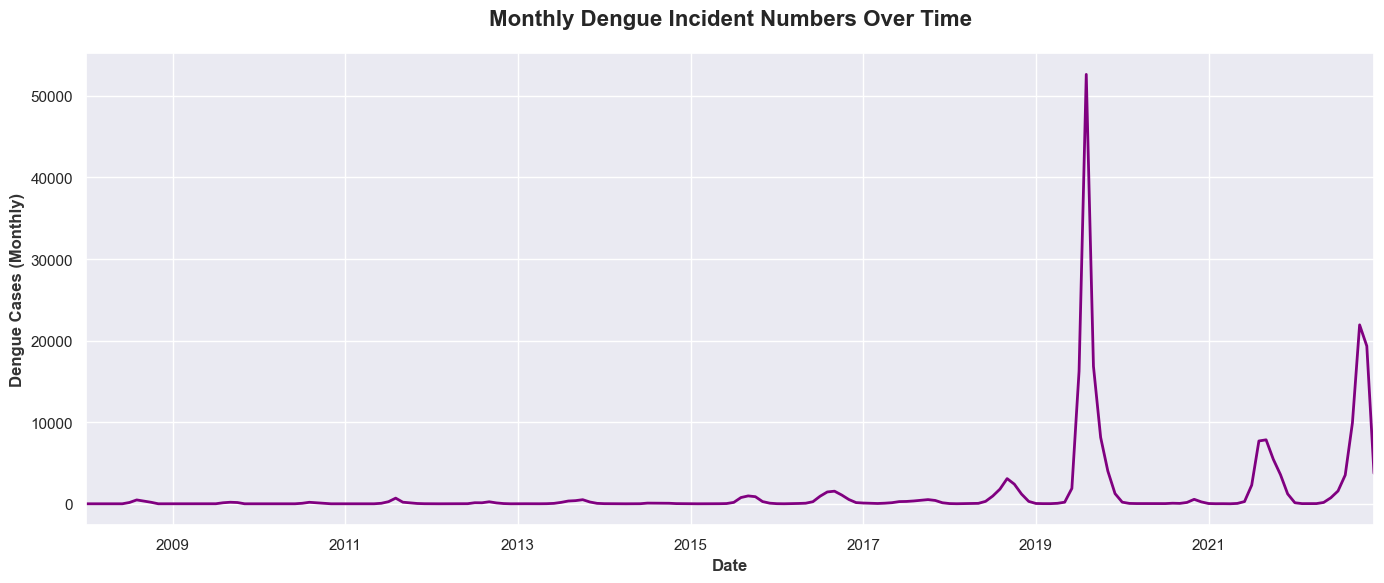

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd # Ensure pandas is imported if you're executing this

# 1. Set a standard Seaborn style for a professional look
sns.set_theme(style="darkgrid") # Use a clean, professional style

plt.figure(figsize=(14, 6)) # Increased size for better visual space
ax = plt.gca()

# Plotting the data
df['dengue_cases'].plot(
    ax=ax,
    title='Monthly Dengue Incident Numbers Over Time', # Slightly more descriptive title
    color='purple', # Use a clear, distinct blue color (e.g., a nice cyan/blue)
    linewidth=2, # Make the line slightly thicker
)

# Axis Label and Title Styling
plt.ylabel('Dengue Cases (Monthly)', fontsize=12, fontweight='bold', color='#333333')
plt.xlabel('Date', fontsize=12, fontweight='bold', color='#333333')
plt.title(ax.get_title(), fontsize=16, fontweight='bold', pad=20)

# Final Layout Adjustments
plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show()

Checking to know the particular year with the peak dengue cases

In [108]:
# Resample the data to annual frequency ('A') and sum the monthly cases
annual_cases = df['dengue_cases'].resample('YE').sum()
annual_cases

Date
2008-12-31      1151
2009-12-31       472
2010-12-31       409
2011-12-31      1359
2012-12-31       641
2013-12-31      1749
2014-12-31       375
2015-12-31      3162
2016-12-31      6060
2017-12-31      2769
2018-12-31     10148
2019-12-31    101354
2020-12-31      1405
2021-12-31     28429
2022-12-31     61089
Freq: YE-DEC, Name: dengue_cases, dtype: int64

In [97]:
# Find the highest case count recorded
max_cases = annual_cases.max()
print(max_cases)

101354


In [100]:
# Filter the annual data to find the years that match the maximum count
peak_years_data = annual_cases[annual_cases == max_cases]
print(peak_years_data)

Date
2019-12-31    101354
Freq: YE-DEC, Name: dengue_cases, dtype: int64


In [109]:
#Extract the year(s) from the index
peak_years = peak_years_data.index.year.tolist()
peak_years

[2019]

In [110]:
print(f"\nMaximum Annual Cases: {max_cases}")
print(f"Year(s) with Peak Cases: {peak_years}")


Maximum Annual Cases: 101354
Year(s) with Peak Cases: [2019]


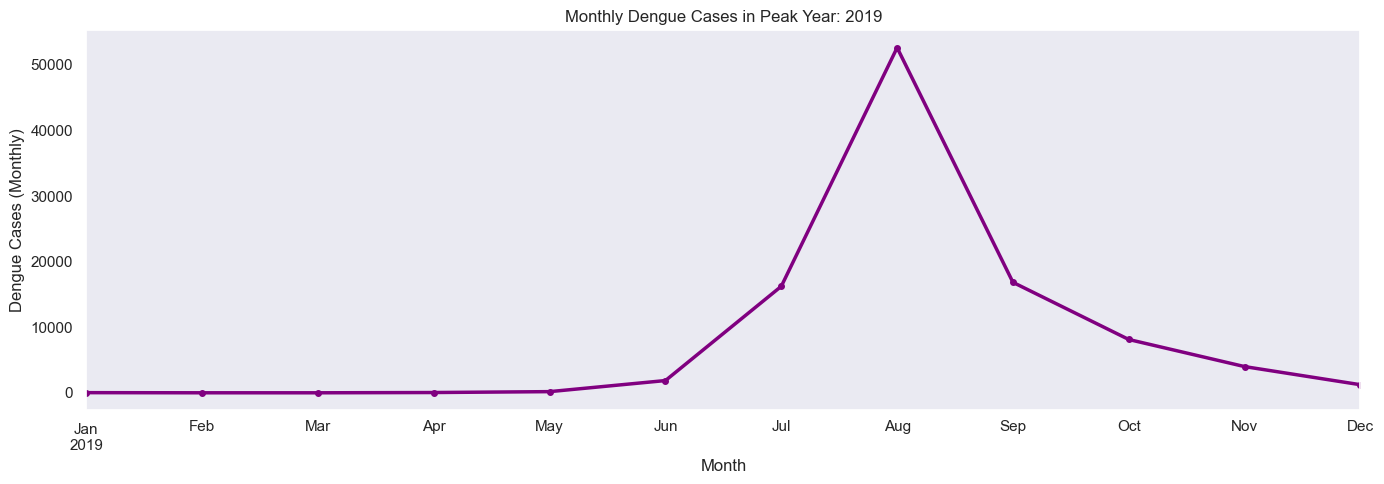

In [131]:
# Assuming the peak year is stored in the first element of the list\
sns.set_theme(style="dark") # Use a clean, professional style
peak_year_to_plot = peak_years[0] 

plt.figure(figsize=(14, 5))

# Filter the original DataFrame 'df' for the specific year
peak_year_df = df[df.index.year == peak_year_to_plot]

peak_year_df['dengue_cases'].plot(
    title=f'Monthly Dengue Cases in Peak Year: {peak_year_to_plot}',
    color='purple',
    linewidth=2.5,
    marker='o',
    markersize=4
)

plt.ylabel('Dengue Cases (Monthly)')
plt.xlabel('Month') # X-axis will now just show the months of that year
# plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

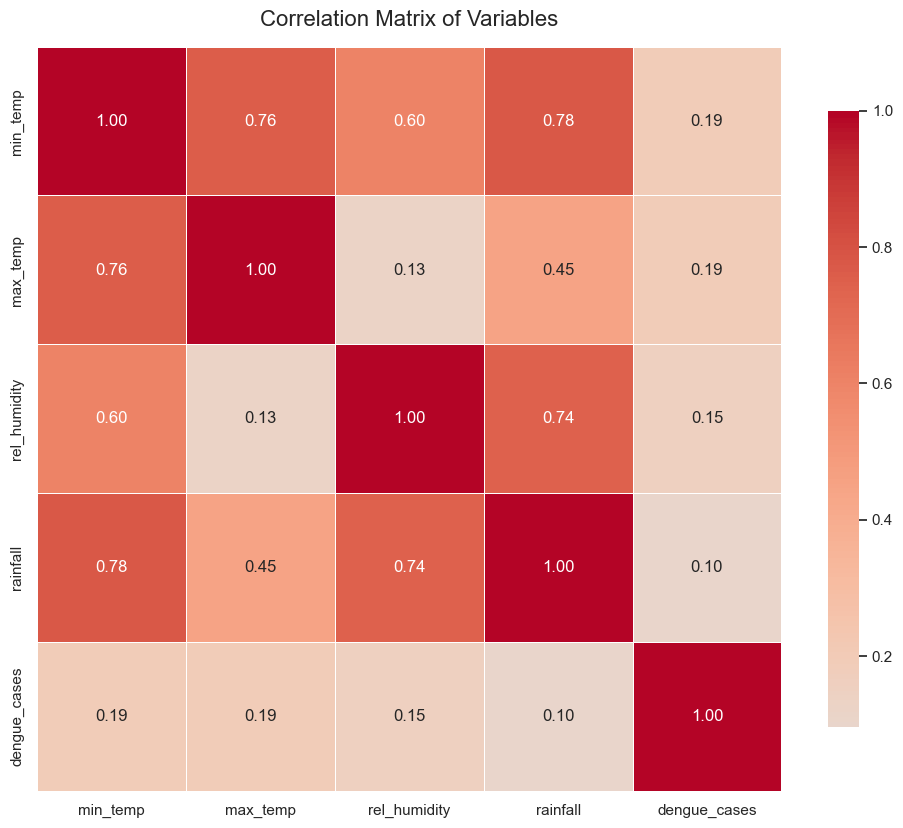

In [141]:
# Visualize correlations between climate and cases
plt.figure(figsize=(12, 10)) # Use a good size for readability

sns.heatmap(
    df.corr(),
    center=0,          # Ensure the color map centers on 0 (no correlation)
    cmap='coolwarm',   # Divergent color map: Red for negative, Blue for positive
    annot=True,        # Display the correlation values on the cells
    fmt='.2f',         # Format the annotation values to 2 decimal places
    square=True,       # Make the cells square (standard for matrices)
    linewidths=.5,     # Add slight lines between cells for better definition
    cbar_kws={"shrink": .8} # Slightly shrink the color bar
)

plt.title('Correlation Matrix of Variables', fontsize=16, pad=15)
plt.show()

Creatting the lagged variables that will serve as the exogenous predictors (X) for my model.

In [147]:
# creating a simple average temperature column
df['avg_temp'] = (df['min_temp'] + df['max_temp'])/2

# create lagged feature (1,,2, and 3 months ago)
# The lag duration is based on the disease vector's life cycle (mosquitoes)

lags = [1,2,3]
for lag in lags:
    # Lagged Dengue Cases (strong predictor)
    df[f'cases_lag_{lag}'] = df['dengue_cases'].shift(lag)

    # Lagged Climate Variables (Exogenous features)
    df[f'temp_lag_{lag}'] = df['avg_temp'].shift(lag)
    df[f'rainfall_lag_{lag}'] = df['rainfall'].shift(lag)
    df[f'humidity_lag_{lag}'] = df['rel_humidity'].shift(lag)

In [150]:
# Drop rows with NaNs created by the shift operation (the first 3 rows)
df = df.dropna()

In [155]:
df.head()

,min_temp,max_temp,rel_humidity,rainfall,dengue_cases,avg_temp,cases_lag_1,temp_lag_1,rainfall_lag_1,humidity_lag_1,cases_lag_2,temp_lag_2,rainfall_lag_2,humidity_lag_2,cases_lag_3,temp_lag_3,rainfall_lag_3,humidity_lag_3
Date,,,,,,,,,,,,,,,,,,
2008-04-01,19.0,34.0,73.9,29.4,0,26.50,0.0,23.60,30.2,76.9,0.0,17.75,19.9,72.6,0.0,17.65,39.9,78.8
2008-05-01,21.1,34.2,77.4,217.7,0,27.65,0.0,26.50,29.4,73.9,0.0,23.60,30.2,76.9,0.0,17.75,19.9,72.6
2008-06-01,22.7,31.8,85.7,425.3,0,27.25,0.0,27.65,217.7,77.4,0.0,26.50,29.4,73.9,0.0,23.60,30.2,76.9
2008-07-01,24.2,31.1,88.1,699.5,160,27.65,0.0,27.25,425.3,85.7,0.0,27.65,217.7,77.4,0.0,26.50,29.4,73.9
2008-08-01,24.2,31.7,86.8,431.2,473,27.95,160.0,27.65,699.5,88.1,0.0,27.25,425.3,85.7,0.0,27.65,217.7,77.4


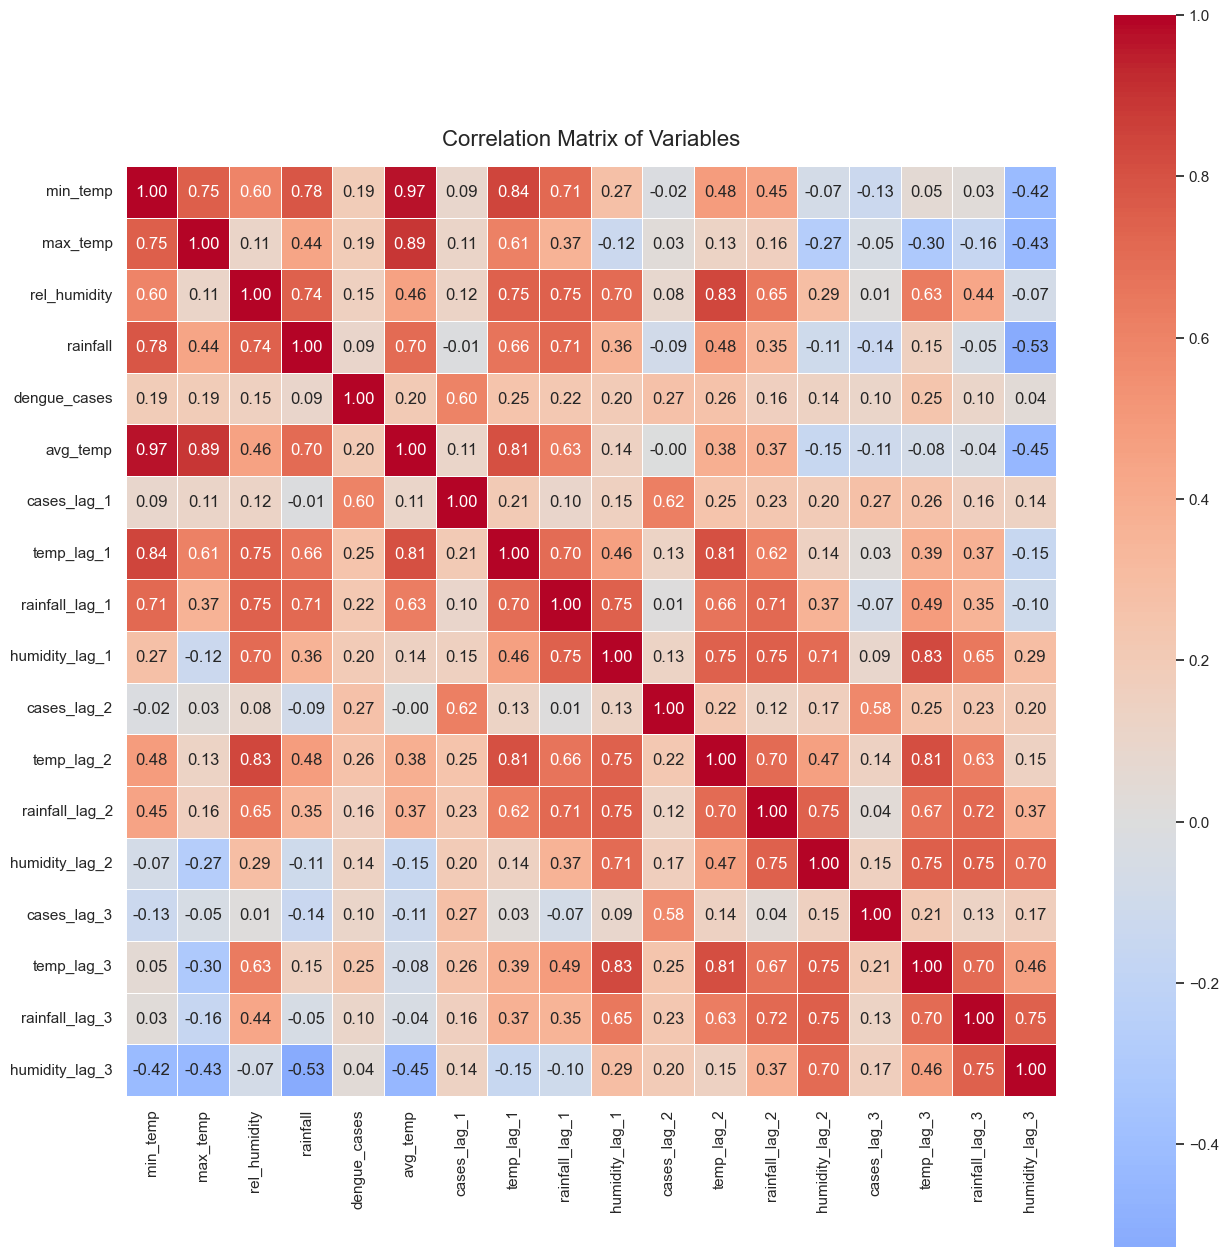

In [166]:
# Visualize correlations between lagged climate and cases

plt.figure(figsize=(15, 20)) # Use a good size for readability

sns.heatmap(
    df.corr(),
    center=0,          # Ensure the color map centers on 0 (no correlation)
    cmap='coolwarm',   # Divergent color map: Red for negative, Blue for positive
    annot=True,        # Display the correlation values on the cells
    fmt='.2f',         # Format the annotation values to 2 decimal places
    square=True,       # Make the cells square (standard for matrices)
    linewidths=.5,     # Add slight lines between cells for better definition
    cbar_kws={"shrink": .8} # Slightly shrink the color bar
)

plt.title('Correlation Matrix of Variables', fontsize=16, pad=15)
plt.show()

In [171]:
# Perform Augmented Dickey-Fuller (ADF) Test

adf_result = adfuller(df['dengue_cases'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -6.84822920423229
p-value: 1.7207544442637935e-09


In [172]:
# Decide if differencing is needed:
# If p-value > 0.05, the series is likely non-stationary, and you should difference (d=1 in SARIMA).
if adf_result[1] > 0.05:
    print("Series is non-stationary. Differencing (d=1) will be applied in the SARIMAX model.")
    # For a visual check of stationarity
    df['dengue_diff'] = df['dengue_cases'].diff().dropna()
    df['dengue_diff'].plot(title='Differenced Dengue Cases')
    plt.show()

else:
    print("Series is stationary or trend-stationary. d=0 will be used.")

Series is stationary or trend-stationary. d=0 will be used.


In [234]:
# # Data Split and Model Fitting
# # We want to test on the last 2 years (24 months) to see how well it predicts "new" future data
# test_months = 24
# train_data = df.iloc[:-test_months] # All data EXCEPT the last 24 months
# test_data = df.iloc[-test_months:]  # ONLY the last 24 months

# # Define Target (y) and Exogenous (X) Variables
# # Target
# y_train = train_data['dengue_cases']
# y_test = test_data['dengue_cases']

# # Exogenous Features (The best ones we found in the heatmap)
# # We select the specific columns we identified as strong predictors
# selected_features = ["rainfall_lag_1"]

# X_train = train_data[selected_features]
# X_test = test_data[selected_features]

# print(f"Training Data Shape: {X_train.shape}")
# print(f"Test Data Shape: {X_test.shape}")

# # Define and Fit the SARIMAX Model
# # order=(p, d, q) -> We use d=0 because your ADF test said it's stationary!
# # seasonal_order=(P, D, Q, s) -> We use s=12 for monthly data.
# # We start with a standard baseline: (1, 0, 1) x (1, 1, 1, 12)

# model = SARIMAX(y_train,
#                 exog=X_train,
#                 order=(1, 0, 0),              # d=0 (Stationary!)
#                 seasonal_order=(0, 1, 0, 12), # s=12 (Monthly cycle)
#                 enforce_stationarity=False,
#                 enforce_invertibility=False)

# print("\nFitting model... (This might take a few seconds)")
# results = model.fit(disp=False, maxiter=100)

# print(results.summary())

In [236]:
# Define Constants and Split Data 

# Define the split point
test_months = 24

# Split the main DataFrame by row position
# We only need the 'dengue_cases' column now, as there are no exogenous X variables.
train_data = df.iloc[:-test_months]['dengue_cases'] # Historical data for model training
test_data = df.iloc[-test_months:]['dengue_cases']  # Held-out data for forecast evaluation

# Assign to y variables for clarity
y_train = train_data
y_test = test_data

print(f"Training Data Length (y_train): {len(y_train)}")
print(f"Test Data Length (y_test): {len(y_test)}")

# Define and Fit the Pure SARIMA Model 

# Based on my previous successful analysis and parameter simplification:
# FINAL SARIMA STRUCTURE: (1, 0, 0) x (0, 1, 0, 12)

model = SARIMAX(y_train,
                order=(1, 0, 0),              # Non-Seasonal: p=1, d=0, q=0
                seasonal_order=(0, 1, 0, 12), # Seasonal: P=0, D=1, Q=0, s=12
                enforce_stationarity=False,
                enforce_invertibility=False)

print("\nFitting final pure SARIMA model...")
results = model.fit(disp=False, maxiter=100)

print(results.summary())

Training Data Length (y_train): 153
Test Data Length (y_test): 24

Fitting final pure SARIMA model...


C:\Users\HomePC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HomePC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                       dengue_cases   No. Observations:                  153
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood               -1408.858
Date:                            Fri, 28 Nov 2025   AIC                           2821.716
Time:                                    05:13:33   BIC                           2827.600
Sample:                                04-01-2008   HQIC                          2824.107
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5494      0.024     23.166      0.000       0.503       0.596
sigma2      3.224e+07   4.57e-10   

In [238]:
# We want to forecast from the end of the training data up to the end of the test data.
# 'start' is the row index immediately following y_train.
# 'end' is the index of the very last observation in the full DataFrame (df).

forecast = results.get_prediction(start=len(y_train),
                                  end=len(y_train) + len(y_test) - 1, 
                                  dynamic=False) # Use dynamic=False for stepwise prediction

# Extract the predicted mean values
pred_mean = forecast.predicted_mean

# Evaluate the Model (Calculate Error Metrics)
# Root Mean Squared Error (RMSE) is the standard metric for time series.
rmse = np.sqrt(mean_squared_error(y_test, pred_mean))
mae = np.mean(np.abs(y_test - pred_mean)) # Mean Absolute Error (MAE)

print("--- Model Evaluation ---")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")

--- Model Evaluation ---
RMSE (Root Mean Squared Error): 6815.59
MAE (Mean Absolute Error): 3716.04


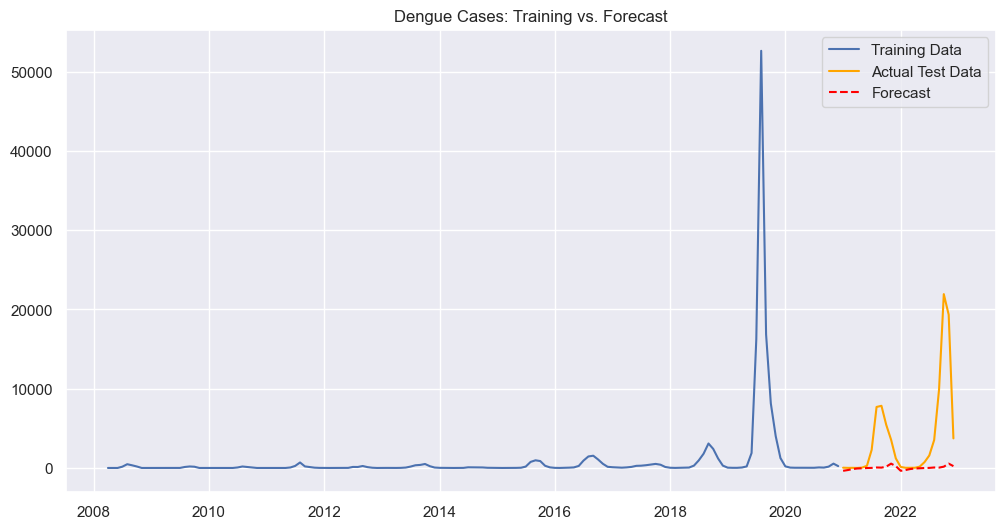

In [239]:
# Plot the Results for Visualization

# Plotting the training data, actual test data, and forecast
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Actual Test Data', color='orange')
plt.plot(y_test.index, pred_mean, label='Forecast', color='red', linestyle='--')
plt.title('Dengue Cases: Training vs. Forecast')
plt.legend()
plt.grid(True)
plt.show()